# precision recall curve

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [63]:
#create dataset with 5 predictor variables
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#use logistic regression model to make predictions
y_score = classifier.predict_proba(X_test)[:, 1]

In [64]:
import random
import numpy as np
y = np.random.random(300)
print(y)

[1.81043232e-01 3.97408217e-01 4.27614661e-01 9.57410022e-01
 2.44942131e-01 4.15284207e-02 5.64014430e-01 6.82018568e-01
 1.61415289e-01 1.89733591e-01 4.40744142e-01 4.77817874e-01
 8.88419056e-01 3.79726603e-01 4.35689132e-01 3.12254296e-01
 4.49346569e-01 8.83148132e-01 8.81809063e-01 9.22900523e-01
 5.76663229e-01 3.91803650e-01 8.21240142e-02 5.30142936e-01
 4.77841722e-01 2.26683584e-01 3.82926492e-01 1.76529426e-01
 9.89230496e-01 7.88453463e-01 9.95800254e-01 7.45212627e-01
 5.12844424e-01 9.92669034e-01 8.34649018e-02 9.85444086e-01
 5.69634762e-01 5.76318350e-01 2.94798531e-01 1.10879430e-01
 8.22715344e-01 5.80028510e-01 9.74220388e-01 1.89030980e-01
 7.82425661e-01 7.51272012e-03 3.46770573e-01 8.07513673e-01
 7.26462463e-01 2.60494107e-01 9.29924969e-01 9.99784651e-01
 9.27663551e-01 6.37443077e-01 7.59573927e-01 8.97155634e-01
 2.73802207e-01 5.69269458e-01 1.88059439e-01 3.73619918e-01
 3.96081453e-01 9.91558882e-01 8.40061698e-01 8.33304759e-01
 8.69041620e-01 8.673914

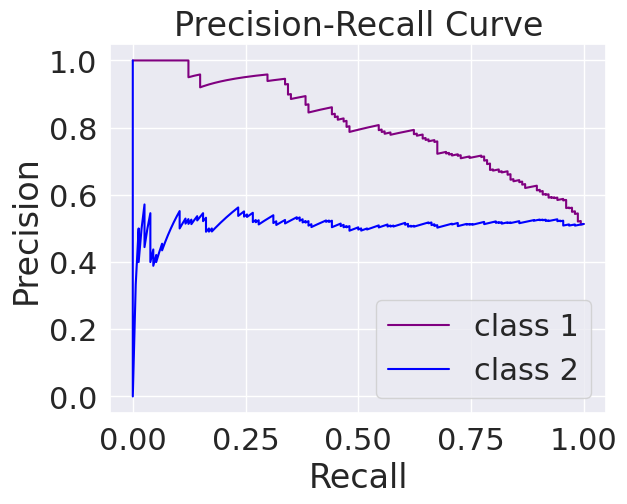

In [68]:
#calculate precision and recall
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_score)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall1, precision1, color='purple')
ax.plot(recall2, precision2, color='blue')
ax.legend(['class 1', 'class 2'])


#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [86]:
print(precision1[0])

0.5133333333333333


In [90]:
print(recall1[0])

1.0


In [89]:
y_score[0]/(y_test[0]+y_score[0])

0.27229973359814047

# ROC curve

In [79]:
import random
import numpy as np
y1 = np.random.random(500)
print(y1)

[0.88192247 0.69156394 0.0799772  0.07382761 0.84417695 0.08452725
 0.475468   0.69000415 0.13970982 0.95671091 0.28720465 0.41084307
 0.42374299 0.1190498  0.28712522 0.73448676 0.75898112 0.72814223
 0.58632153 0.39557749 0.22982894 0.77434628 0.66529137 0.47334595
 0.20228031 0.12140472 0.74528605 0.58370089 0.45892785 0.66201814
 0.26921901 0.92712439 0.20599216 0.66408567 0.09612145 0.80288883
 0.45097444 0.25445918 0.75588774 0.50616597 0.27048204 0.34002838
 0.87768611 0.87371647 0.34352148 0.64813336 0.8729258  0.63067932
 0.99151348 0.08146508 0.93739586 0.12895337 0.4777502  0.13486933
 0.01324566 0.85670113 0.08445468 0.88144664 0.56621715 0.75008566
 0.65405436 0.55649723 0.93954991 0.10970996 0.66882114 0.88086934
 0.65574457 0.2483473  0.7620249  0.77263353 0.11691805 0.36859638
 0.68307495 0.13925025 0.88165858 0.26470703 0.285102   0.25810058
 0.42948685 0.15117794 0.11431485 0.22857965 0.80745797 0.80004426
 0.03984756 0.01580254 0.29094469 0.23949078 0.19087893 0.2791

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903
y: ROC AUC=0.511


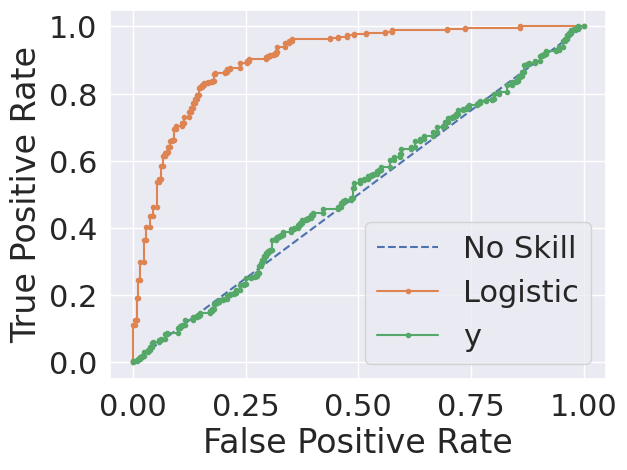

In [82]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
y_auc = roc_auc_score(testy, y1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('y: ROC AUC=%.3f' % (y_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
y_fpr, y_tpr, _ = roc_curve(testy, y1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(y_fpr, y_tpr, marker='.', label='y')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [30]:
testy

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [81]:
lr_probs

array([9.95972685e-01, 9.97994843e-01, 5.29883066e-03, 1.52374194e-01,
       9.98333350e-01, 5.00061448e-01, 1.97631392e-02, 2.34633843e-02,
       9.82000697e-01, 7.06465180e-01, 4.16201961e-03, 7.46446600e-01,
       7.66567488e-03, 9.61958719e-01, 9.35214568e-01, 8.07653554e-01,
       1.44803886e-01, 9.56532321e-01, 1.56957507e-01, 9.44908759e-01,
       8.67007620e-01, 4.10282064e-01, 2.04815673e-02, 6.67093752e-01,
       4.26334713e-03, 9.56694469e-01, 6.92577362e-01, 9.94406759e-01,
       2.49159988e-02, 5.50542684e-01, 7.92214513e-01, 8.15242298e-01,
       8.18291856e-02, 8.23317999e-01, 1.53516867e-02, 7.98798532e-02,
       9.87551937e-01, 9.36923464e-01, 9.86339822e-01, 3.19318661e-01,
       9.82576369e-03, 3.82722802e-02, 9.83635286e-02, 9.83780221e-01,
       6.53737641e-03, 5.29530623e-01, 5.01616608e-01, 9.97760930e-01,
       8.40960809e-03, 1.42082825e-01, 2.21934800e-02, 6.47786780e-01,
       9.79115074e-01, 2.32942383e-01, 5.09205311e-02, 9.03776284e-01,
      

# Confusion matrix

[1 1 0 0]
[1 1 0 0]
[[2 0]
 [0 2]]
1.0
1.0
1.0
1.0


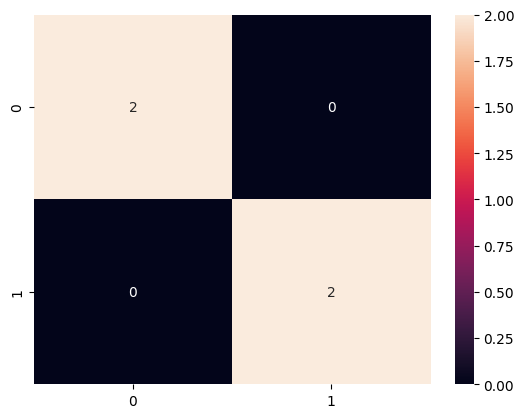

pass 0.7439902354649889


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

##########모델 생성

model = LogisticRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

y_predict = model.predict(x_test)

print(y_test) #[1, 1, 0, 0]
print(y_predict) #[1 1 0 0]
cm = confusion_matrix(y_test, y_predict) 
print(cm) 
'''
[[2 0]
 [0 2]]
'''

accuracy_score = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]) #정확도
print(accuracy_score) #1.0

recall_score = (cm[1][1]) / (cm[1][0]+cm[1][1]) #재현율
print(recall_score) #1.0 
#--

precision_score = (cm[1][1]) / (cm[0][1] + cm[1][1]) #정밀도
print(precision_score) #1.0
#|
#|

f1_score = ((precision_score * recall_score) / (precision_score + recall_score)) * 2
print(f1_score) #1.0 #F1 score

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()

##########모델 예측

x_test = np.array([
    [4, 6]
])

y_predict = model.predict(x_test)
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(label, confidence) #|

In [3]:
y_predict

array([[0.25600976, 0.74399024]])

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
sns.set(font_scale=2)

In [9]:
arr = [[5,0,0,0], # when input was A, prediction was all A
        [0,10,0,0], # when input was B, prediction was all B
        [0,0,15,0], # when input was C, prediction was all C
        [0,0,0,5]]  # when input was D, prediction was all D
df_cm = DataFrame(arr, index=[i for i in "ABCD"],
                 columns= [i for i in "ABCD"])
df_cm

,A,B,C,D
A,5,0,0,0
B,0,10,0,0
C,0,0,15,0
D,0,0,0,5


<Axes: title={'center': 'confusion matrix without confusion'}>

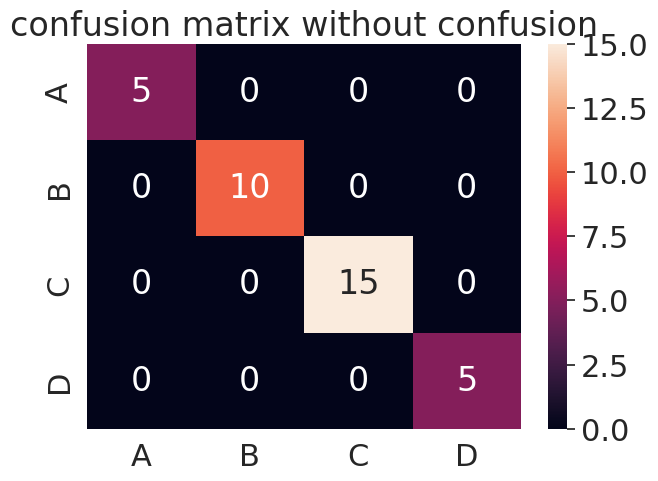

In [12]:
plt .figure(figsize = (7,5))
plt.title('confusion matrix without confusion')
sns.heatmap(df_cm, annot=True)